In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [2]:
dataset_path = r"C:\Users\sumit\OneDrive\Desktop\waste-classification\garbage-dataset"
classes = sorted(os.listdir(dataset_path))
print(classes)
print("Total classes:", len(classes))


['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Total classes: 10


In [3]:
IMG_SIZE = (64,64)
X, y = [], []

for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_path, cls)
    files = os.listdir(folder)[:500]   # memory friendly

    print(f"Loading {cls} - {len(files)} images")

    for file in files:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0
        X.append(img)
        y.append(idx)

X = np.array(X)
y = np.array(y)
print("Dataset shape:", X.shape, y.shape)


Loading battery - 500 images
Loading biological - 500 images
Loading cardboard - 500 images
Loading clothes - 500 images
Loading glass - 500 images
Loading metal - 500 images
Loading paper - 500 images
Loading plastic - 500 images
Loading shoes - 500 images
Loading trash - 500 images
Dataset shape: (5000, 64, 64, 3) (5000,)


In [4]:
y = to_categorical(y, num_classes=len(classes))

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, " Validation:", X_val.shape)


Train: (4000, 64, 64, 3)  Validation: (1000, 64, 64, 3)


In [5]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 62, 62, 32)  │         896 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ batch_normalization         │ (None, 62, 62, 32)  │         128 │
│ (BatchNormalization)        │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d               │ (None, 31, 31, 32)  │           0 │
│ (MaxPooling2D)              │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)           │ (None, 29, 29, 64)  │      18,496 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ batch_normalization_1       │ (None, 29, 29, 64)  │         256 │
│ (BatchNormalization)        │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d_1             │ (None, 14, 14, 64)  │           0 │
│ (MaxPooling2D)              │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)           │ (None, 12, 12, 128) │      73,856 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ batch_normalization_2       │ (None, 12, 12, 128) │         512 │
│ (BatchNormalization)        │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d_2             │ (None, 6, 6, 128)   │           0 │
│ (MaxPooling2D)              │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ flatten (Flatten)           │ (None, 4608)        │           0 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 256)         │   1,179,904 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dropout (Dropout)           │ (None, 256)         │           0 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 10)          │       2,570 │
└─────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 1,276,618 (4.87 MB)

 Trainable params: 1,276,170 (4.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)
mc = ModelCheckpoint("model/waste_classifier_model.h5", save_best_only=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=25,
    callbacks=[es, lr, mc],
    steps_per_epoch=len(X_train)//32
)


Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.2536 - loss: 3.3975

125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 276ms/step - accuracy: 0.2977 - loss: 2.5803 - val_accuracy: 0.0990 - val_loss: 4.3059 - learning_rate: 0.0010
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.3653 - loss: 1.9031

125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 267ms/step - accuracy: 0.3785 - loss: 1.8707 - val_accuracy: 0.2000 - val_loss: 2.8988 - learning_rate: 0.0010
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.4327 - loss: 1.7139

125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 275ms/step - accuracy: 0.4200 - loss: 1.7293 - val_accuracy: 0.2130 - val_loss: 2.7769 - learning_rate: 0.0010
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4199 - loss: 1.7067

125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 305ms/step - accuracy: 0.4230 - loss: 1.6910 - val_accuracy: 0.4580 - val_loss: 1.6516 - learning_rate: 0.0010
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 268ms/step - accuracy: 0.4695 - loss: 1.5599 - val_accuracy: 0.3860 - val_loss: 1.9941 - learning_rate: 0.0010
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 273ms/step - accuracy: 0.4880 - loss: 1.5168 - val_accuracy: 0.3960 - val_loss: 1.9884 - learning_rate: 0.0010
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - accuracy: 0.5372 - loss: 1.3796 - val_accuracy: 0.4750 - val_loss: 1.7453 - learning_rate: 5.0000e-04
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5513 - loss: 1.3222

125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.5587 - loss: 1.3052 - val_accuracy: 0.5240 - val_loss: 1.4626 - learning_rate: 5.0000e-04
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5803 - loss: 1.2372

125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.5595 - loss: 1.2745 - val_accuracy: 0.5610 - val_loss: 1.4091 - learning_rate: 5.0000e-04
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 260ms/step - accuracy: 0.5692 - loss: 1.2418 - val_accuracy: 0.5110 - val_loss: 1.6219 - learning_rate: 5.0000e-04
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - accuracy: 0.5835 - loss: 1.2236 - val_accuracy: 0.4590 - val_loss: 1.8618 - learning_rate: 5.0000e-04
Epoch 12/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.6258 - loss: 1.1097

125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.6242 - loss: 1.0984 - val_accuracy: 0.6060 - val_loss: 1.3077 - learning_rate: 2.5000e-04
Epoch 13/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.6374 - loss: 1.0472

125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - accuracy: 0.6323 - loss: 1.0629 - val_accuracy: 0.6300 - val_loss: 1.2335 - learning_rate: 2.5000e-04
Epoch 14/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - accuracy: 0.6447 - loss: 1.0322 - val_accuracy: 0.5770 - val_loss: 1.3644 - learning_rate: 2.5000e-04
Epoch 15/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.6507 - loss: 1.0072 - val_accuracy: 0.5930 - val_loss: 1.3404 - learning_rate: 2.5000e-04
Epoch 16/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - accuracy: 0.6660 - loss: 0.9618 - val_accuracy: 0.6080 - val_loss: 1.2783 - learning_rate: 1.2500e-04
Epoch 17/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.6708 - loss: 0.9634 - val_accuracy: 0.6130 - val_loss: 1.2725 - learning_rate: 1.2500e-04
Epoch 18/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.6812 - loss: 0.9098 - val_accuracy: 0.5960 - val_loss: 1.3233 - learning_rate: 6.2500e-05


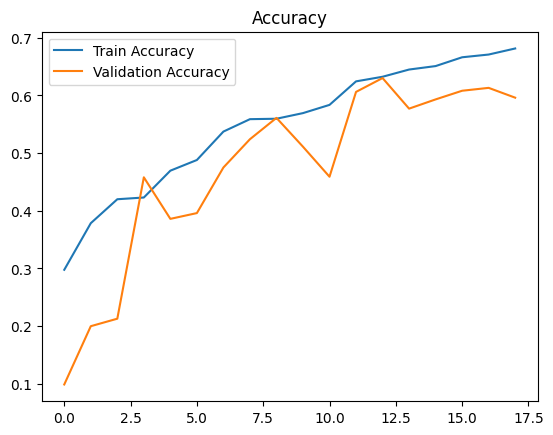

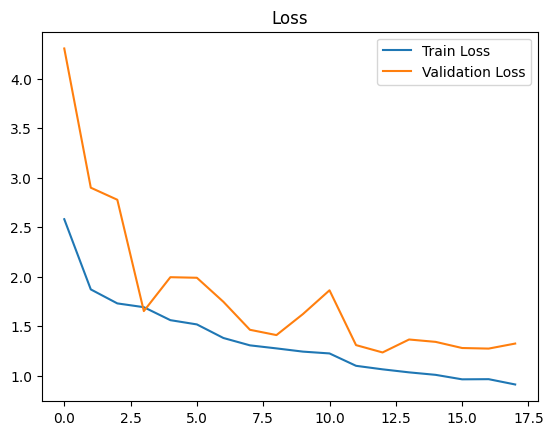

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()


In [9]:
print("🔍 Checking model performance")
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")


🔍 Checking model performance
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6300 - loss: 1.2335
Final Validation Accuracy: 63.00%


In [10]:
model.save("model/waste_classifier_model.h5")
print("Model saved!")


Model saved!
